# INSIGHTS SHARK'S ATTACKS ON MEN SINCE 2000

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns

%matplotlib inline

In [3]:
sharksClean = pd.read_csv('../DATA/sharks_clean.csv', encoding = "ISO-8859-1")

In [4]:
sharksClean.head()

,caseNumber,date,year,type,country,area,location,activity,name,sex,age,injury,fatal(y/n),time,species,investigatorOrSource,pdf,hrefFormula,href,caseNumber1,caseNumber2,originalOrder,originalIndex,hemisphere
0,2018-06-09,2018-06-09,2018,Invalid,usa,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,False,7.45,Unknown,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-06-09,2018-06-09,6301.0,2,North
1,2018-06-08,2018-06-08,2018,Unprovoked,australia,New South Wales,Arrawarra Headland,Surfing,male,M,-1,Minor injury to lower leg,False,-1.00,Unknown,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-06-08,2018-06-08,6300.0,3,South
2,2018-06-04,2018-06-04,2018,Provoked,mexico,Colima,La Ticla,Free diving,Gustavo Ramos,M,-1,Lacerations to leg & hand shark PROVOKED INCIDENT,False,-1.00,Tiger,A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-06-04,2018-06-04,6299.0,4,North
3,2018-06-03,2018-06-03,2018,Unprovoked,australia,New South Wales,"Flat Rock, Ballina",Kite surfing,Chris Â,M,-1,"No injury, board bitten",False,-1.00,Unknown,"Daily Telegraph, 6/4/2018",2018.06.03.b-FlatRock.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-06-03,2018-06-03,6298.0,5,South
4,2018-06-03,2018-06-03,2018,Unprovoked,brazil,Pernambuco,"Piedade Beach, Recife",Swimming,Jose Ernesto da Silva,M,18,FATAL,True,17.00,Tiger,"Diario de Pernambuco, 6/4/2018",2018.06.03.a-daSilva.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018-06-03,2018-06-03,6297.0,6,South


## Número de ataques por año

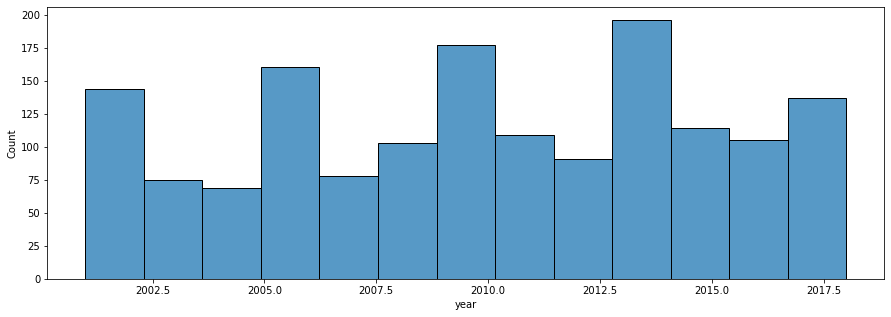

In [36]:
plt.figure(figsize = (15,5))
sns.histplot(data = sharksClean, x = 'year')
plt.show()

## Número de ataques por año y país

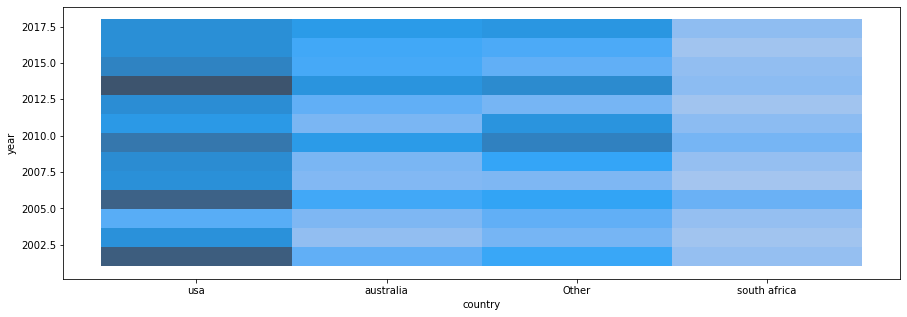

In [35]:
plt.figure(figsize = (15,5))
sns.histplot(data = sharksClean, y = 'year', x = 'country')
plt.show()

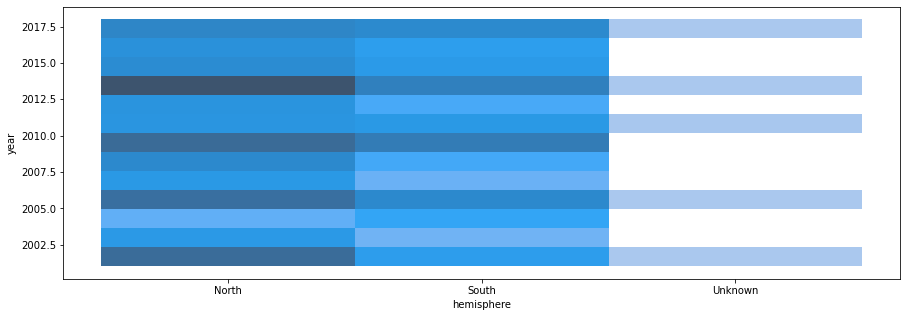

In [37]:
plt.figure(figsize = (15,5))
sns.histplot(data = sharksClean, y = 'year', x = 'hemisphere')
plt.show()

## Número de ataques por hemisferio

In [9]:
def histogram(column):
    plt.figure(figsize = (10,10))
    grafico = sns.countplot(column,  data = sharksClean, order = sharksClean[column].value_counts().index)
    grafico.tick_params(axis='x', rotation = 90)

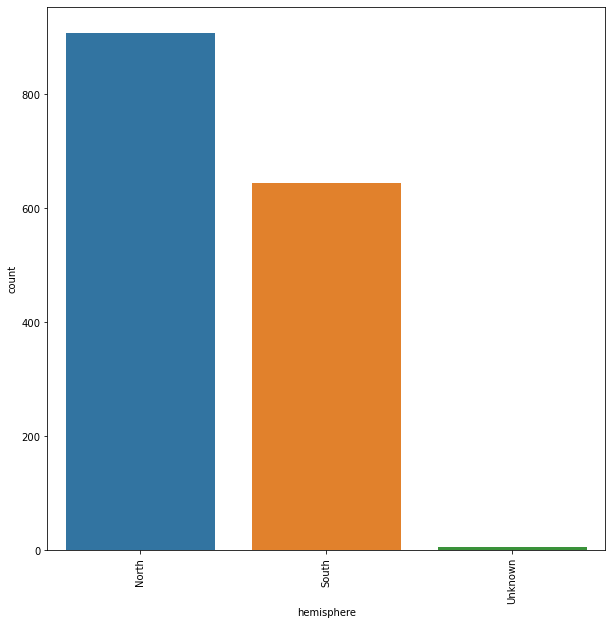

In [10]:
histogram('hemisphere')

## Número de ataques por país

In [11]:
def group(column, threshold):   
    table = sharksClean[column].value_counts()
    grouped_columns = [i for i in table.index if table[i] < threshold]
    for n in grouped_columns:
        sharksClean.loc[sharksClean[column] == n, column] = 'Other'
    print(sharksClean[column].value_counts())

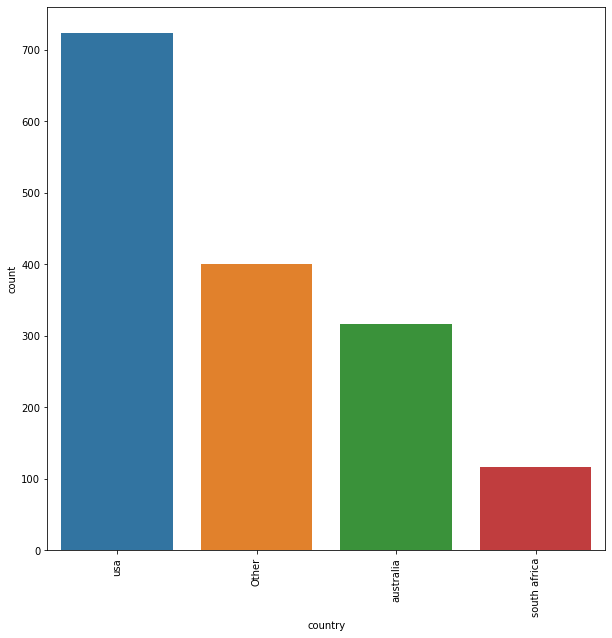

In [13]:
histogram('country')

## Número de ataques por edad

#### Valores en -1 para los desconocidos

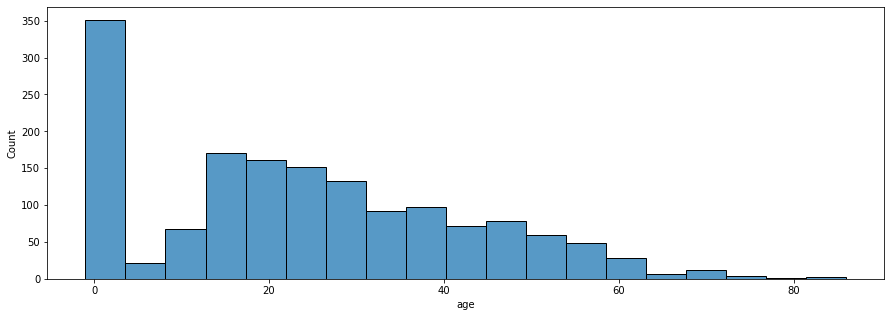

In [32]:
plt.figure(figsize = (15,5))
sns.histplot(data = sharksClean, x = 'age')
plt.show()

## Número de ataques mortales

<AxesSubplot:xlabel='fatal(y/n)'>

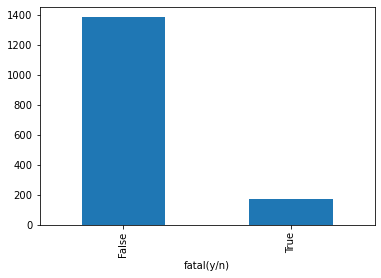

In [29]:
sharksClean.groupby('fatal(y/n)').count()["originalIndex"].plot(kind = 'bar')